# Data analysis

## 1. Data exploration

### 1.1 The dataset

The set of data which will be analyzed in this jupyter notebook stems from an open source dataset which can be found at OpenNeuro:

Zareba, M.R., Fafrowicz, M., Marek, T., Beldzik, E., Oginska, H., & Domagalik, A. (2022). Structural (t1) images of 136 young healthy adults; study of effects of chronotype, sleep quality and daytime sleepiness on brain structure. OpenNeuro. [Dataset] doi:10.18112/openneuro.ds003826.v3.0.0

The dataset contains 136 participants and 10 variables. The data were collected to explore circadian rythmicity and more precisely, to research structural brain correlates of human chronotypes.

The following variables are part of the dataset:

| Variable | Description |
| --- | --- |
| participant_id | Code of each participant |
| age | Age of each participant |
| sex | Sex of each participant as reported by the participant |
| group | Experimental group the participant was classified to (EC: early chronotype or LC: late chronotype) |
| ChQ-ME (CHQME)* | Morningness-eveningness scale of Chronotype Questionnaire |
| ChQ-AM (CHQAM)* | Amplitude scale of Chronotype Questionnaire |
| PSQI | Overall score in Pittsburgh Sleep Quality Index |
| ESS | Overall score in Epworth Sleepiness Scale |
| Published | Indication whether the data of a given participant was used in a published work |
| L_Ent/FFG_CTh (LEFG)* | Mean cortical thickness within the significant cluster in the left entorhinal and fusiform gyri from the published research article |

*Renamed within the course of the data analysis

The planned analyses entail the following:
- Read the dataset
- Explore the dataset and get a general overview, including a descriptive summary, data types, distributions
- Check for outliers and missing values
- Conduct descriptive analyses: descriptive statistics of dataset and subsets
- Conduct inferential analyses
    - Compute correlations between all interval scaled variables
    - Compute t-Test between EC and LC groups regarding LEFG
    - Calculate regression model with LEFG as dependent variable and CHQAM as predictor

How will the respective steps be implemented:
- Read the data, data wrangling with the pandas module and explore the dataset a bit with some built-in functions
- Data visualization with matplotlib, seaborn
- Data analyses and statistics with numpy, statsmodels and pingouin

### 1.2 Reading data

In [1]:
# load the data file via python and pandas module

import pandas as pd
data_set = pd.read_csv("#path")
# show first 10 rows
data_set.head(n = 10)

,participant_id,age,sex,group,ChQ-ME,ChQ-AM,PSQI,ESS,Published,L_Ent/FFG_CTh
0,sub-02,33,M,EC,19,17,4,4,Yes,2.221920
1,sub-03,22,M,EC,17,16,3,11,No,NaN
2,sub-04,26,F,EC,20,20,1,10,Yes,2.612423
3,sub-05,28,F,LC,23,20,7,13,No,NaN
4,sub-07,27,M,EC,21,16,4,8,Yes,2.528243
5,sub-08,22,F,EC,15,19,1,4,Yes,3.427409
6,sub-09,35,F,EC,12,22,1,4,No,NaN
7,sub-10,22,F,EC,19,24,6,10,No,NaN
8,sub-11,26,M,EC,18,20,3,9,No,NaN
9,sub-13,23,F,EC,17,21,3,11,No,NaN


In [2]:
# check if number of variables in loaded dataset matches number of variables indicated in the description of the experiment

print(len(data_set.columns))

if len(data_set.columns) > 10:
    print("The number of variables in the loaded dataset is higher than the number of variables on the website.")
elif len(data_set.columns) < 10:
    print("The number of variables in the loaded dataset is lower than the number of variables on the website.")
elif len(data_set.columns) == 10: 
    print("The number of variables in the loaded dataset is identical with the number of variables on the website.")

10
The number of variables in the loaded dataset is identical with the number of variables on the website.


### 1.3 Exploring data

#### 1.3.1 Data types and variables

In [3]:
# check data type of the dataset

type(data_set)

pandas.core.frame.DataFrame

In [4]:
# check data type of variables

data_set.dtypes

participant_id     object
age                 int64
sex                object
group              object
ChQ-ME              int64
ChQ-AM              int64
PSQI                int64
ESS                 int64
Published          object
L_Ent/FFG_CTh     float64
dtype: object

#### 1.3.2 Summary of the dataset

In [5]:
# get dimensions of the dataset

data_set.shape

(136, 10)

In [6]:
# display columns

data_set.columns

Index(['participant_id', 'age', 'sex', 'group', 'ChQ-ME', 'ChQ-AM', 'PSQI',
       'ESS', 'Published', 'L_Ent/FFG_CTh'],
      dtype='object')

In [7]:
# access index

data_set.index

RangeIndex(start=0, stop=136, step=1)

In [8]:
# summary of the dataset

data_set.describe()

,age,ChQ-ME,ChQ-AM,PSQI,ESS,L_Ent/FFG_CTh
count,136.000000,136.000000,136.000000,136.000000,136.000000,113.000000
mean,24.330882,21.720588,20.808824,3.073529,7.066176,2.802199
std,3.729870,5.632829,3.744655,1.401757,3.513365,0.344349
min,18.000000,11.000000,11.000000,0.000000,0.000000,2.148740
25%,22.000000,17.000000,18.000000,2.000000,5.000000,2.550988
50%,23.000000,21.500000,21.000000,3.000000,7.000000,2.749730
75%,26.000000,27.000000,24.000000,4.000000,9.000000,3.011604
max,35.000000,32.000000,29.000000,9.000000,17.000000,3.773190


In [9]:
# display proportions of experimental groups

data_set.group.value_counts("EC")

# equal distribution of participants across the two groups

EC    0.5
LC    0.5
Name: group, dtype: float64

Yes    113
No      23
Name: Published, dtype: int64


<AxesSubplot:title={'center':'Share of published vs. non-published data'}, ylabel='Share'>

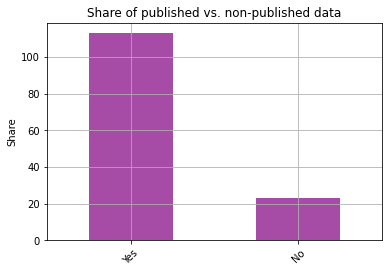

In [10]:
# show frequencies of published vs. non-published data

print(data_set.Published.value_counts())
data_set["Published"].value_counts().plot(kind = "bar", color = "purple", alpha = 0.7, grid = True, rot = 45, title = "Share of published vs. non-published data", ylabel = "Share")

### 1.4 Data wrangling

#### 1.4.1 Rename variables

In [11]:
# Rename ChQ-ME, ChQ-AM, L_Ent/FFG_CTh for reasons of convenience and better usability in later analyses

data_set = data_set.rename(columns = {"ChQ-ME":"CHQME", "ChQ-AM":"CHQAM", "L_Ent/FFG_CTh":"LEFG"})
print(data_set)

    participant_id  age sex group  CHQME  CHQAM  PSQI  ESS Published      LEFG
0           sub-02   33   M    EC     19     17     4    4       Yes  2.221920
1           sub-03   22   M    EC     17     16     3   11        No       NaN
2           sub-04   26   F    EC     20     20     1   10       Yes  2.612423
3           sub-05   28   F    LC     23     20     7   13        No       NaN
4           sub-07   27   M    EC     21     16     4    8       Yes  2.528243
..             ...  ...  ..   ...    ...    ...   ...  ...       ...       ...
131        sub-142   25   F    EC     18     22     4    4       Yes  2.997560
132        sub-143   23   F    LC     24     18     1    1       Yes  2.750960
133        sub-144   23   F    LC     22     27     4   11        No       NaN
134        sub-145   32   F    LC     23     15     1    6       Yes  2.558474
135        sub-146   24   F    EC     16     25     3    3       Yes  2.749730

[136 rows x 10 columns]


#### 1.4.2 Check for missing values

participant_id    False
age               False
sex               False
group             False
CHQME             False
CHQAM             False
PSQI              False
ESS               False
Published         False
LEFG               True
dtype: bool participant_id     0
age                0
sex                0
group              0
CHQME              0
CHQAM              0
PSQI               0
ESS                0
Published          0
LEFG              23
dtype: int64


<AxesSubplot:title={'center':'Variables with missing values'}, ylabel='Number of missing values'>

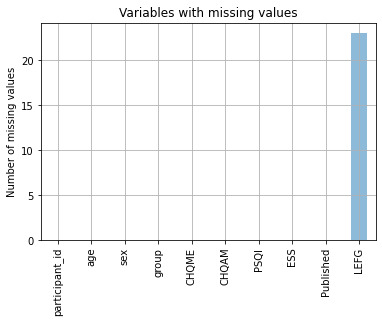

In [12]:
# check which columns might contain missing values

print(data_set.isna().any(), data_set.isna().sum())
data_set.isna().sum().plot(kind = "bar", alpha = 0.5, title = "Variables with missing values", ylabel = "Number of missing values", grid = True)

# only the 'LEFG' column includes missing values (23, more precisely)

In [13]:
# drop all rows with missing values

cleaned_data = data_set.dropna()
print(cleaned_data)

    participant_id  age sex group  CHQME  CHQAM  PSQI  ESS Published      LEFG
0           sub-02   33   M    EC     19     17     4    4       Yes  2.221920
2           sub-04   26   F    EC     20     20     1   10       Yes  2.612423
4           sub-07   27   M    EC     21     16     4    8       Yes  2.528243
5           sub-08   22   F    EC     15     19     1    4       Yes  3.427409
10          sub-14   26   F    EC     15     27     3    5       Yes  2.747110
..             ...  ...  ..   ...    ...    ...   ...  ...       ...       ...
130        sub-141   23   F    EC     21     17     5    8       Yes  2.726486
131        sub-142   25   F    EC     18     22     4    4       Yes  2.997560
132        sub-143   23   F    LC     24     18     1    1       Yes  2.750960
134        sub-145   32   F    LC     23     15     1    6       Yes  2.558474
135        sub-146   24   F    EC     16     25     3    3       Yes  2.749730

[113 rows x 10 columns]


In [14]:
# only published data are left after missing values have been removed

cleaned_data.Published.value_counts()

Yes    113
Name: Published, dtype: int64

In [15]:
# remove participant_id and Published columns from dataset

cleaned_data.drop(["participant_id", "Published"], inplace = True, axis = 1)
print(cleaned_data)

     age sex group  CHQME  CHQAM  PSQI  ESS      LEFG
0     33   M    EC     19     17     4    4  2.221920
2     26   F    EC     20     20     1   10  2.612423
4     27   M    EC     21     16     4    8  2.528243
5     22   F    EC     15     19     1    4  3.427409
10    26   F    EC     15     27     3    5  2.747110
..   ...  ..   ...    ...    ...   ...  ...       ...
130   23   F    EC     21     17     5    8  2.726486
131   25   F    EC     18     22     4    4  2.997560
132   23   F    LC     24     18     1    1  2.750960
134   32   F    LC     23     15     1    6  2.558474
135   24   F    EC     16     25     3    3  2.749730

[113 rows x 8 columns]


<ipython-input-15-d246b89f2a3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(["participant_id", "Published"], inplace = True, axis = 1)


In [16]:
# reset index of dataframe

cleaned_data.reset_index(drop = True, inplace = True)
print(cleaned_data)

     age sex group  CHQME  CHQAM  PSQI  ESS      LEFG
0     33   M    EC     19     17     4    4  2.221920
1     26   F    EC     20     20     1   10  2.612423
2     27   M    EC     21     16     4    8  2.528243
3     22   F    EC     15     19     1    4  3.427409
4     26   F    EC     15     27     3    5  2.747110
..   ...  ..   ...    ...    ...   ...  ...       ...
108   23   F    EC     21     17     5    8  2.726486
109   25   F    EC     18     22     4    4  2.997560
110   23   F    LC     24     18     1    1  2.750960
111   32   F    LC     23     15     1    6  2.558474
112   24   F    EC     16     25     3    3  2.749730

[113 rows x 8 columns]


#### 1.4.3 Check for outliers

<AxesSubplot:>

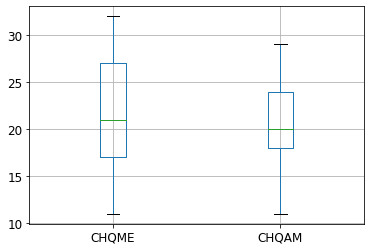

In [17]:
# create boxplot for data stemming from rating scales CHQME, CHQAM

cleaned_data.boxplot(column = ["CHQME", "CHQAM"], fontsize = 12)

<AxesSubplot:>

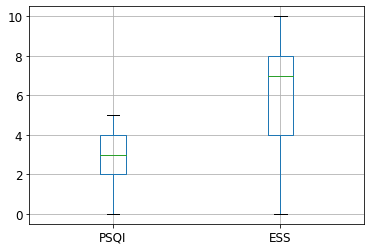

In [18]:
# create boxplot for data stemming from rating scales PSQI, ESS

cleaned_data.boxplot(column = ["PSQI", "ESS"], fontsize = 12)

<AxesSubplot:>

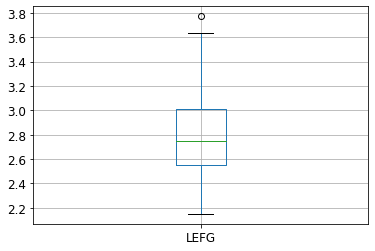

In [19]:
# create boxplot for variable LEFG (mean cortical thickness within the significant cluster in the left entorhinal and fusiform gyri) 

cleaned_data.boxplot(column = ["LEFG"], fontsize = 12)

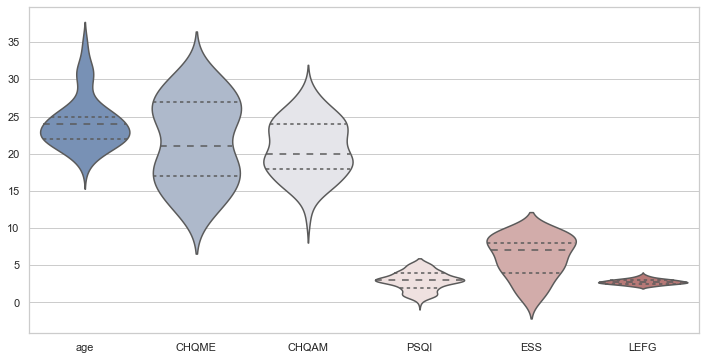

In [20]:
# plot variable distributions with violinplot 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = "whitegrid")
plt.figure(figsize = (12,6))
ax = sns.violinplot(data = cleaned_data, inner = "quart", palette = "vlag", scale = "width")

#### 1.4.4 Save the processed dataframe

In [21]:
# save cleaned dataset in a seperate tsv file for future analyses

cleaned_data.to_csv("path", sep="\t", index=False)

## 2. Data analysis

### 2.1 Descriptive analyses

#### 2.1.1 Descriptive statistics

F    71
M    42
Name: sex, dtype: int64 F    0.628319
M    0.371681
Name: sex, dtype: float64


<AxesSubplot:title={'center':'Female vs. male participants'}>

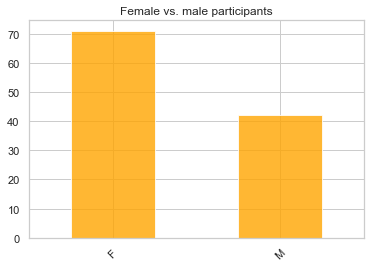

In [22]:
# show proportion of sexes

print(cleaned_data.sex.value_counts(), cleaned_data.sex.value_counts("F"))
cleaned_data["sex"].value_counts().plot(kind = 'bar', title = "Female vs. male participants", rot = 45, color = "orange", alpha = 0.8)

Text(0.5, 1.0, 'Distribution of age')

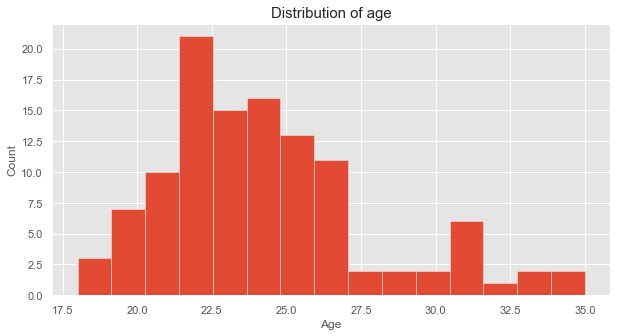

In [23]:
# show age distribution of cleaned dataset

plt.figure(figsize = (10, 5))
plt.style.use('ggplot')
plt.hist(cleaned_data["age"], bins = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution of age', fontsize = 15)

#### 2.1.2 Descriptive analyses of sub datasets

As the goal of the study was to compare early (EC) and late (LC) chronotypes, the data will be split into two groups for further analyses. To double check and compare numbers, I will apply to methods: groupby and splitting the dataset into two subsets.

In [24]:
# group dataset by variable group

grouped_data = cleaned_data.groupby("group")
print(grouped_data.head())

print(grouped_data.describe()) 

    age sex group  CHQME  CHQAM  PSQI  ESS      LEFG
0    33   M    EC     19     17     4    4  2.221920
1    26   F    EC     20     20     1   10  2.612423
2    27   M    EC     21     16     4    8  2.528243
3    22   F    EC     15     19     1    4  3.427409
4    26   F    EC     15     27     3    5  2.747110
10   20   M    LC     26     19     3    3  3.637643
11   22   M    LC     30     24     2    4  2.791802
12   22   F    LC     30     28     3    4  3.057604
13   24   F    LC     30     22     3    9  2.973411
15   20   F    LC     24     24     5    7  3.138291
        age                                                    CHQME  \
      count       mean       std   min   25%   50%   75%   max count   
group                                                                  
EC     57.0  24.666667  3.709704  19.0  22.0  24.0  26.0  35.0  57.0   
LC     56.0  23.785714  3.223292  18.0  22.0  23.0  25.0  33.0  56.0   

                  ...   ESS        LEFG                 

In [25]:
# create sub dataset EC (early chronotype)

cleaned_data_EC = cleaned_data[cleaned_data["group"]=="EC"]
print(cleaned_data_EC.head())
print(cleaned_data_EC.shape)
print(cleaned_data_EC.describe())

   age sex group  CHQME  CHQAM  PSQI  ESS      LEFG
0   33   M    EC     19     17     4    4  2.221920
1   26   F    EC     20     20     1   10  2.612423
2   27   M    EC     21     16     4    8  2.528243
3   22   F    EC     15     19     1    4  3.427409
4   26   F    EC     15     27     3    5  2.747110
(57, 8)
             age      CHQME      CHQAM       PSQI        ESS       LEFG
count  57.000000  57.000000  57.000000  57.000000  57.000000  57.000000
mean   24.666667  16.614035  20.561404   2.982456   6.157895   2.676822
std     3.709704   2.782306   4.013449   1.217304   2.839702   0.325480
min    19.000000  11.000000  13.000000   1.000000   0.000000   2.155443
25%    22.000000  15.000000  17.000000   2.000000   4.000000   2.437362
50%    24.000000  17.000000  20.000000   3.000000   7.000000   2.612423
75%    26.000000  19.000000  24.000000   4.000000   8.000000   2.854649
max    35.000000  21.000000  29.000000   5.000000  10.000000   3.427409


<AxesSubplot:>

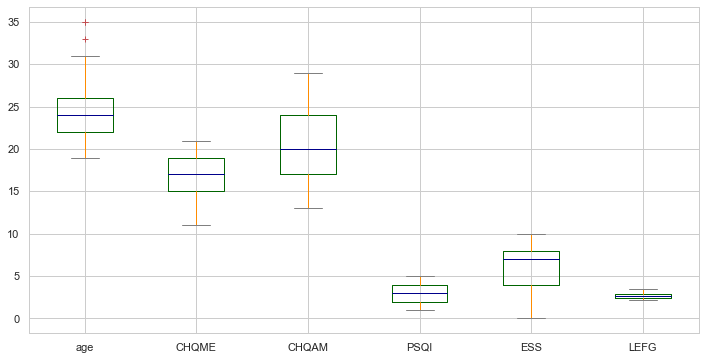

In [26]:
# create boxplots to check for outliers

sns.set_style("whitegrid")

color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

cleaned_data_EC.plot.box(color = color, sym = "r+", figsize = (12, 6))

In [27]:
# create sub dataset LC (late chronotype)

cleaned_data_LC = cleaned_data[cleaned_data["group"] == "LC"]
print(cleaned_data_LC.head())
print(cleaned_data_LC.shape)
print(cleaned_data_LC.describe())

    age sex group  CHQME  CHQAM  PSQI  ESS      LEFG
10   20   M    LC     26     19     3    3  3.637643
11   22   M    LC     30     24     2    4  2.791802
12   22   F    LC     30     28     3    4  3.057604
13   24   F    LC     30     22     3    9  2.973411
15   20   F    LC     24     24     5    7  3.138291
(56, 8)
             age      CHQME      CHQAM       PSQI        ESS       LEFG
count  56.000000  56.000000  56.000000  56.000000  56.000000  56.000000
mean   23.785714  26.642857  20.892857   2.892857   6.089286   2.929816
std     3.223292   2.596701   3.581156   1.201190   2.718802   0.317377
min    18.000000  22.000000  11.000000   0.000000   0.000000   2.148740
25%    22.000000  24.000000  18.000000   2.000000   4.000000   2.726168
50%    23.000000  27.000000  21.500000   3.000000   6.500000   2.907958
75%    25.000000  28.250000  24.000000   4.000000   8.250000   3.084435
max    33.000000  32.000000  28.000000   5.000000  10.000000   3.773190


<AxesSubplot:>

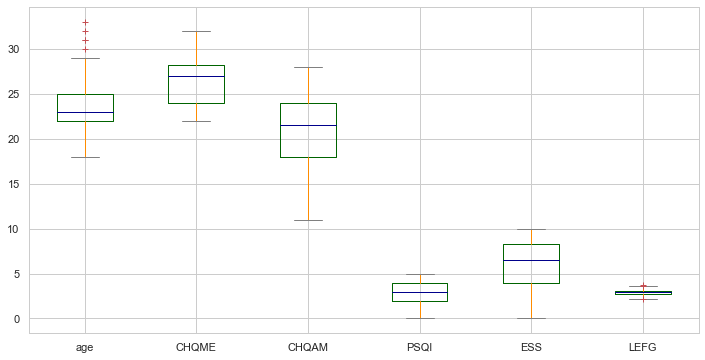

In [28]:
# create boxplots to check for outliers

sns.set_style("whitegrid")

color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

cleaned_data_LC.plot.box(color = color, sym = "r+", figsize = (12, 6))

### 2.2 Inferential analyses

#### 2.2.1 Correlations

In [29]:
# compute correlation for all interval scaled variables

cleaned_data.corr()

,age,CHQME,CHQAM,PSQI,ESS,LEFG
age,1.000000,-0.117129,-0.062657,0.033151,-0.045492,-0.145327
CHQME,-0.117129,1.000000,0.050394,0.026095,0.061523,0.410584
CHQAM,-0.062657,0.050394,1.000000,0.207318,-0.039262,0.221554
PSQI,0.033151,0.026095,0.207318,1.000000,0.055865,-0.010243
ESS,-0.045492,0.061523,-0.039262,0.055865,1.000000,0.073330
LEFG,-0.145327,0.410584,0.221554,-0.010243,0.073330,1.000000


Text(0.5, 1.0, 'Correlations between variables')

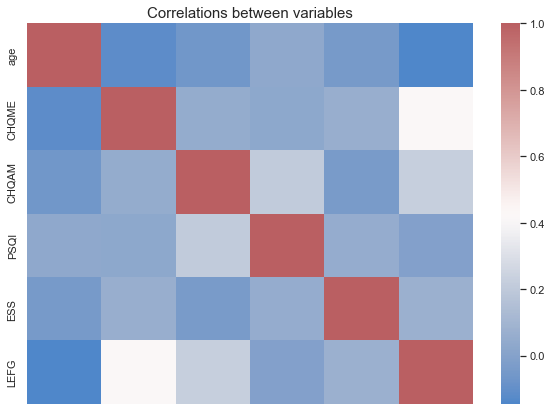

In [30]:
# show heatmap for all correlations

sns.set_palette('colorblind')
plt.figure(figsize = (10,7))
sns.heatmap(cleaned_data.corr(), xticklabels = False, cmap = 'vlag', alpha = 0.8)
plt.title("Correlations between variables", fontsize = 15)

In [31]:
import pingouin as pg

# compute pairwise correlations

data_cor = pg.pairwise_corr(cleaned_data, method = "pearson")
print(data_cor.head())

# compute corrected p values

data_cor['p_corr'] = pg.multicomp(data_cor['p-unc'].to_numpy(), method = 'fdr_bh')[1]
print(data_cor.head())

# check for significance

data_cor[data_cor['p_corr'] <= 0.05]

     X      Y   method alternative    n         r          CI95%     p-unc  \
0  age  CHQME  pearson   two-sided  113 -0.117129   [-0.3, 0.07]  0.216640   
1  age  CHQAM  pearson   two-sided  113 -0.062657  [-0.24, 0.12]  0.509703   
2  age   PSQI  pearson   two-sided  113  0.033151  [-0.15, 0.22]  0.727408   
3  age    ESS  pearson   two-sided  113 -0.045492  [-0.23, 0.14]  0.632327   
4  age   LEFG  pearson   two-sided  113 -0.145327  [-0.32, 0.04]  0.124578   

    BF10     power  
0   0.25  0.235966  
1  0.146  0.101132  
2  0.125  0.063932  
3  0.132  0.076553  
4  0.377  0.337730  
     X      Y   method alternative    n         r          CI95%     p-unc  \
0  age  CHQME  pearson   two-sided  113 -0.117129   [-0.3, 0.07]  0.216640   
1  age  CHQAM  pearson   two-sided  113 -0.062657  [-0.24, 0.12]  0.509703   
2  age   PSQI  pearson   two-sided  113  0.033151  [-0.15, 0.22]  0.727408   
3  age    ESS  pearson   two-sided  113 -0.045492  [-0.23, 0.14]  0.632327   
4  age   LEFG  

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power,p_corr
8,CHQME,LEFG,pearson,two-sided,113,0.410584,"[0.24, 0.55]",0.000006,2774.687,0.995783,0.000094


Text(0.5, 1.0, 'Correlation between CHQME and LEFG')

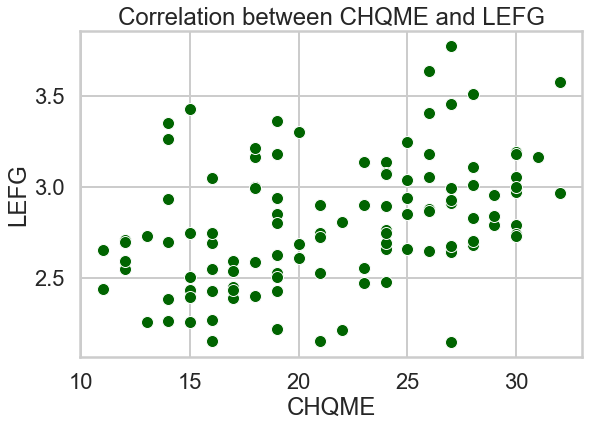

In [32]:
# show significant correlation between CHQME and LEFG in scatterplot to present on a poster at a research conference

sns.set_context("poster")
plt.figure(figsize = (9,6))
sns.scatterplot(x = cleaned_data["CHQME"], y = cleaned_data["LEFG"], color = "darkgreen")
plt.xlabel('CHQME')
plt.title('Correlation between CHQME and LEFG')

#### 2.2.2 t-Test

Compute independent samples t-Test to find out whether the statistics of EC vs. LC group are significantly different regarding their respective LEFG values.

In [33]:
# descriptive statistics

import numpy as np
print(np.mean(cleaned_data_EC["LEFG"]), np.std(cleaned_data_EC["LEFG"]))
print(np.mean(cleaned_data_LC["LEFG"]), np.std(cleaned_data_LC["LEFG"]))

2.676821645385965 0.322612356201287
2.9298158006071424 0.31453061269266647


In [34]:
# test assumptions

# 1. test for normality
print(pg.normality(cleaned_data_EC["LEFG"]))
print(pg.normality(cleaned_data_LC["LEFG"]))
# not fulfilled

# 2. homogeneity of variance
print(pg.homoscedasticity([cleaned_data_EC["LEFG"].to_numpy(), cleaned_data_LC["LEFG"].to_numpy()]))
# fulfilled

            W      pval  normal
LEFG  0.94537  0.012193   False
             W      pval  normal
LEFG  0.973086  0.242428    True
               W     pval  equal_var
levene  0.166541  0.68399       True


In [35]:
# Although the normality assumption was not fulfilled in the case of the EC group, the t-Test was still calculated because n > 30 in both groups. 

pg.ttest(cleaned_data_EC["LEFG"], cleaned_data_LC["LEFG"], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.183427,110.994003,two-sided,0.000058,"[-0.37, -0.13]",0.786941,357.083,0.985595


The t-Test is significant, implying that we can assume a significant difference between early and late chronotype groups regarding their LEFG thickness.

#### 2.2.3 Regression

In the following, a simple regression model with LEFG values being predicted by CHQAM values will be tested.

In [36]:
# predict DV LEFG with IV CHQME

import statsmodels.formula.api as smf

ls = smf.ols("LEFG ~ CHQAM", cleaned_data).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                   LEFG   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.730
Date:                Thu, 17 Mar 2022   Prob (F-statistic):             0.0184
Time:                        18:49:10   Log-Likelihood:                -36.525
No. Observations:                 113   AIC:                             77.05
Df Residuals:                     111   BIC:                             82.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3852      0.177     13.471      0.0

In [37]:
# check assumptions

# 1. normality of residuals

print(pg.normality(cleaned_data["LEFG"]))
print(pg.normality(cleaned_data["CHQAM"]))

# fulfilled

             W      pval  normal
LEFG  0.985395  0.258883    True
              W      pval  normal
CHQAM  0.980228  0.092875    True


Text(0, 0.5, 'LEFG')

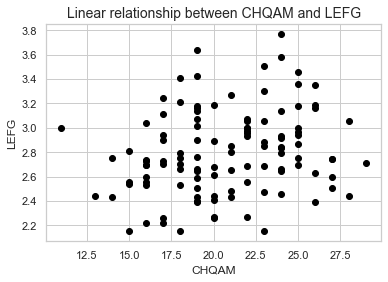

In [38]:
# 2. linearity: relationship between X and mean of Y is linear

sns.set_context("notebook")
sns.set_style("whitegrid")
plt.plot(cleaned_data["CHQAM"], cleaned_data["LEFG"], "o", color = "black");
plt.title("Linear relationship between CHQAM and LEFG", fontsize = 14)
plt.xlabel("CHQAM", fontsize = 12)
plt.ylabel("LEFG", fontsize = 12)

# more or less fulfilled ;)

In [39]:
# 3. independence: observations are independent of each other

from statsmodels.stats.stattools import durbin_watson
durbin_watson(ls.resid)

# between 1.5 and 2.5 --> no correlation between residuals

# fulfilled

2.0231801075682228

                 W          pval  equal_var
levene  210.741781  4.240488e-34      False
{'Test Statistic': 0.9286920466522265, 'Test Statistic p-value': 0.6285460252479051, 'F-Statistic': 0.45576395509843665, 'F-Test p-value': 0.6351551672443978}


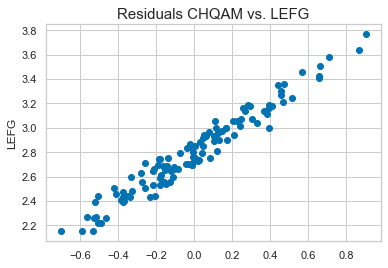

In [40]:
# 4. homoscedasticity: variance of residuals is the same for any value of x

# Levene's test
print(pg.homoscedasticity([cleaned_data["CHQAM"].to_numpy(), cleaned_data["LEFG"].to_numpy()]))
# not fulfilled according to Levene's test result because test is significant --> heteroscedasticity

# perform White's test which is also robust when assumption of normality of residuals has been violated
from statsmodels.stats.diagnostic import het_white
white_test = het_white(ls.resid,  ls.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))
# not significant --> no heteroscedasticity

# additional graphical check to be on the safe side
plt.figure()
plt.title("Residuals CHQAM vs. LEFG", fontsize = 15)
plt.ylabel("LEFG")
plt.scatter(ls.resid, cleaned_data["LEFG"])
plt.show()

# as White's test was not significant and the graph looks also okay, homoscedasticity can be assumed
# assumption fulfilled

/Users/sophie/miniconda3/envs/data_analyses/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual vs. Predicted')

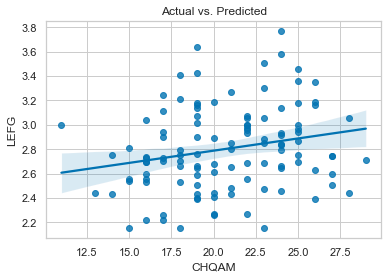

In [41]:
# create scatterplot with regression line to show relationship

sns.regplot(cleaned_data["CHQAM"], cleaned_data["LEFG"])
plt.title("Actual vs. Predicted")